In [1]:
import pandas as pd
df=pd.read_csv("pax_corpus_237_agreements_06-11-20.csv",sep=',',encoding='utf-8')

Version : 


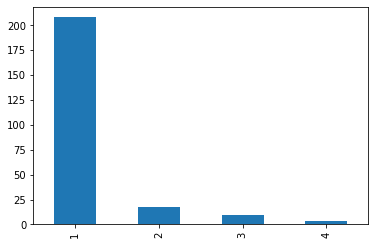

Region : 


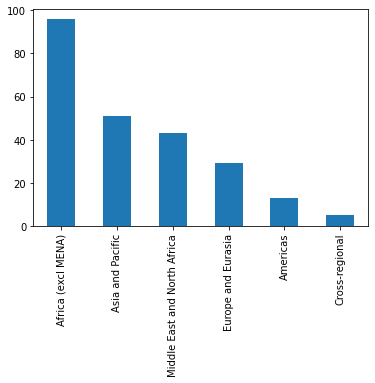

Country : 


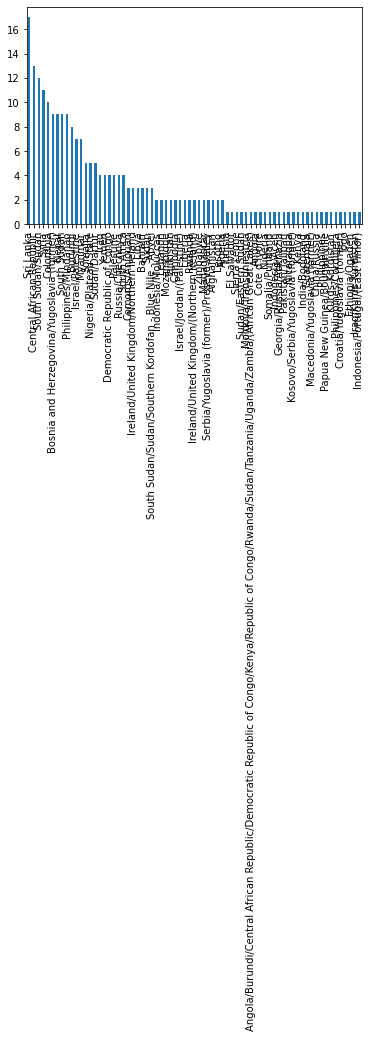

Peace Process Name : 


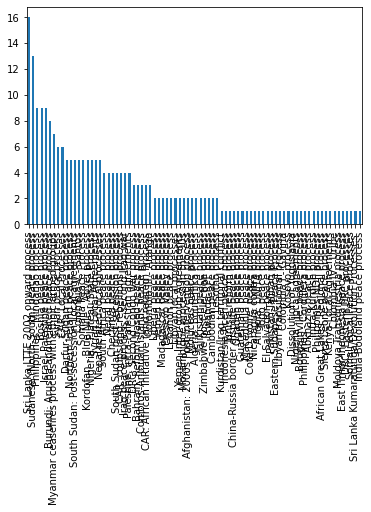

Stage : 


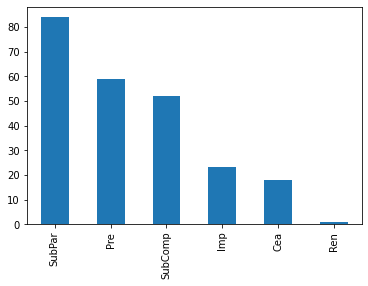

Agreement/Conflict Level : 


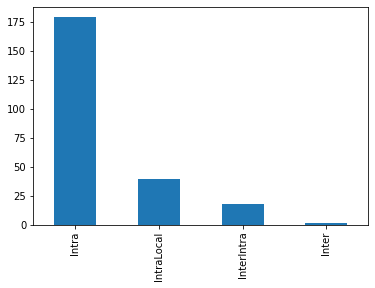

Conflict Nature : 


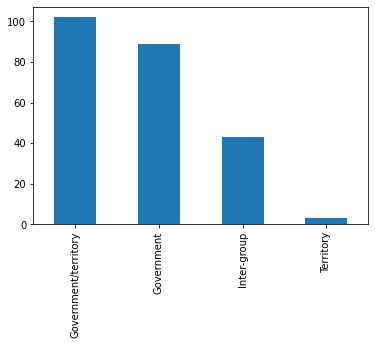

Agreement Status : 


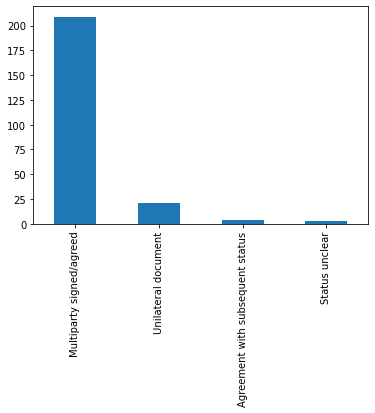

In [2]:
#count the frequency of occurence, draw the histogram
import matplotlib.pyplot as plt	
for key in ['Version','Region','Country','Peace Process Name','Stage','Agreement/Conflict Level','Conflict Nature','Agreement Status']:
    print(key,": ")
    df[key].value_counts().plot.bar()
    plt.show()
    f=open(key.replace("/","-")+".txt",'w',encoding='utf-8')
    for i,j in df[key].value_counts().items():
        f.write(str(i)+" : "+str(j)+"\n")
    f.close()

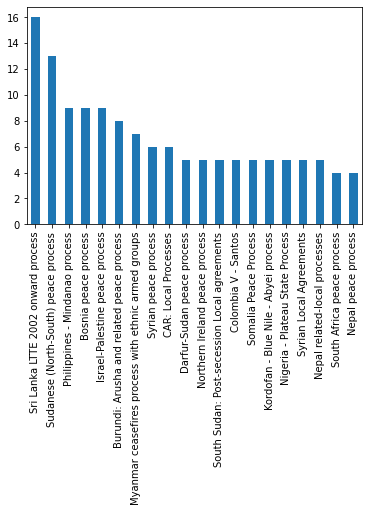

In [3]:
#For intensive horizontal coordinates, draw a histogram of the first 20 values
import matplotlib.pyplot as plt	
df['Peace Process Name'].value_counts()[:20].plot.bar()
plt.show()

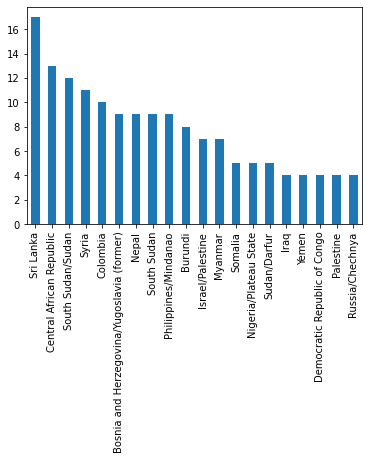

In [4]:
import matplotlib.pyplot as plt	
df['Country'].value_counts()[:20].plot.bar()
plt.show()

In [5]:
#subtotal
df.groupby('Version')[['Region','Country','Agreement/Conflict Level','Conflict Nature']].count()

,Region,Country,Agreement/Conflict Level,Conflict Nature
Version,,,,
1,208,208,208,208
2,17,17,17,17
3,9,9,9,9
4,3,3,3,3


In [6]:
#subtotal
df.groupby('Region')['Agreement/Conflict Level'].value_counts()

Region                        Agreement/Conflict Level
Africa (excl MENA)            Intra                       69
                              IntraLocal                  25
                              InterIntra                   2
Americas                      Intra                       13
Asia and Pacific              Intra                       43
                              IntraLocal                   5
                              InterIntra                   3
Cross-regional                Intra                        3
                              Inter                        1
                              InterIntra                   1
Europe and Eurasia            Intra                       26
                              InterIntra                   3
Middle East and North Africa  Intra                       25
                              InterIntra                   9
                              IntraLocal                   9
Name: Agreement/Conflict Level

In [7]:
#subtotal
df.groupby('Region')['Conflict Nature'].value_counts()

Region                        Conflict Nature     
Africa (excl MENA)            Government              43
                              Government/territory    28
                              Inter-group             25
Americas                      Government              12
                              Inter-group              1
Asia and Pacific              Government/territory    39
                              Government              10
                              Inter-group              2
Cross-regional                Government/territory     3
                              Inter-group              1
                              Territory                1
Europe and Eurasia            Government/territory    24
                              Government               5
Middle East and North Africa  Government              19
                              Inter-group             14
                              Government/territory     8
                              Territo

In [8]:
#Get mathematical statistics of peace process
df['Peace Process'].describe()

count    237.000000
mean      87.109705
std       43.010599
min        2.000000
25%       62.000000
50%       93.000000
75%      115.000000
max      158.000000
Name: Peace Process, dtype: float64

In [9]:
#Output the value range of each column
print("Version: ",set(list(df['Version'])))
print("Region: ",set(list(df['Region'])))
print("Country: ",set(list(df['Country'])))
print("Peace Process: ",set(list(df['Peace Process'])))
print("Peace Process Name: ",set(list(df['Peace Process Name'])))
print("Stage: ",set(list(df['Stage'])))
print("Agreement/Conflict Level: ",set(list(df['Agreement/Conflict Level'])))
print("Conflict Nature: ",set(list(df['Conflict Nature'])))
print("Agreement Status: ",set(list(df['Agreement Status'])))

Version:  {1, 2, 3, 4}
Region:  {'Americas', 'Middle East and North Africa', 'Cross-regional', 'Asia and Pacific', 'Europe and Eurasia', 'Africa (excl MENA)'}
Country:  {'Indonesia/Aceh', 'Nigeria', 'Somalia/Puntland', 'South Africa', 'Angola', 'Indonesia/Moluccas', 'Myanmar', 'Papua New Guinea/Bougainville', 'Somalia', 'Burundi', 'Sri Lanka', 'Comoros/Anjouan', 'Sierra Leone', 'Croatia/Yugoslavia (former)', 'Israel/Jordan/(Palestine)', 'Ethiopia/Ogaden', 'Mozambique', 'Nicaragua', 'Russia/Chechnya', 'Democratic Republic of Congo', 'Rwanda', 'Serbia/Yugoslavia (former)/Presevo Valley', 'Kenya', 'Libya', 'Pakistan/Taliban', 'Guatemala', 'Central African Republic', 'China/Russia', 'Algeria', 'Colombia', 'Philippines', 'Zimbabwe', 'Kurds-Kurdistan', 'Israel/Palestine', 'Liberia', 'Sudan/Eastern Sudan', 'Bahrain', 'Sudan/Darfur', 'Ireland/United Kingdom/Northern Ireland', 'Madagascar', 'Togo', 'Afghanistan', 'Cambodia', 'Philippines/Cordillera', 'Georgia/Russia/Abkhazia', 'India/Bodoland',

In [10]:
df[['Version','Region','Country','Peace Process Name','Stage','Agreement/Conflict Level','Conflict Nature','Agreement Status']]=df[['Version','Region','Country','Peace Process Name','Stage','Agreement/Conflict Level','Conflict Nature','Agreement Status']].astype('category')

In [11]:
#Convert to digital encoding
from sklearn.preprocessing import LabelEncoder
to_labeled=['Version','Region','Country','Peace Process Name','Stage','Agreement/Conflict Level','Conflict Nature','Agreement Status']
for label in to_labeled:
    encoder=LabelEncoder()
    df[label]= encoder.fit_transform(df[label])


In [12]:
#Practice output pearson’s correlation coefficient, still try to understand
import numpy as np
from scipy.stats import pearsonr
columns=['Version','Region','Country','Peace Process Name','Stage','Agreement/Conflict Level','Conflict Nature','Agreement Status']
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        print("pearson relation beside ",columns[i]," and ",columns[j]," is : ")
        print(pearsonr(np.array(df['Country']),np.array(df['Stage'])))

pearson relation beside  Version  and  Region  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Version  and  Country  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Version  and  Peace Process Name  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Version  and  Stage  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Version  and  Agreement/Conflict Level  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Version  and  Conflict Nature  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Version  and  Agreement Status  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Region  and  Country  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Region  and  Peace Process Name  is : 
(-0.03007691843209319, 0.6450250191829369)
pearson relation beside  Region  and  Stage  is : 
(-0.03007691843209319, 0.

In [13]:
#Get clean up words
cleanup_words=set()
with open("cleanup_words.txt",'r',encoding='utf-8') as f:
    for line in f.readlines():
        line=line.strip()
        if line!="":
            cleanup_words.add(line)

In [14]:
#Clean data
from textblob import TextBlob
agreement_texts=""
for idx,text in enumerate(list(df['Agreement Text'])):
    print(idx)
    tags=TextBlob(text).tags
    for word,tag in tags:
        if tag in ['TO','UH','PDT','CC','CD','DT','WDT','WP','PRP','IN'] or word in cleanup_words:
            continue
        agreement_texts+=word
        agreement_texts+=" "

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236


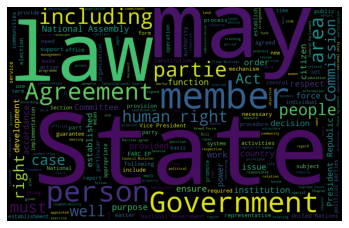

In [15]:
# Print wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(
       # background_color="white"
        width=1500,              
        height=960,              
        margin=10               
        ).generate(agreement_texts)

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

wordcloud.to_file('Final_text.png')

## Reflection

For my challenge, the instructor wanted us to focus on the content of the agreement text. My data is about religion issue. Religion has strong communication, mass character and exclusion. As a result, religion can lead lots of regional conflicts. When I search for the required data from pa-x, the number of agreements on religious issues is large in group category. According to the 'agreement / confirm level' histogram, peace agreements on religions are mainly related to internal conflicts. Taking Sri Lanka, which has the largest number of peace agreements, as an example, it has a wide range of religions. It has more conflicts. The contention between religions on believers and domestic status is an important factor for internal conflicts. A few months ago, Sri Lanka also had a bloody conflict dominated by Islam. As the chart of 'stage', religious issues are generally extreme. There are few peace agreements for a complete cease-fire. By comparing the distribution of 'agreement / confirm level' and 'agreement status', the wider scope of the peace agreement has, the less clear its agreement status is. From the proportion of 'may' in the word cloud, we can see that the peace agreement is full of uncertainty. By the type of words in the word cloud, the peace agreement is mainly to fight for more self-interest. For all peace agreement of religions, they do not determine a long-term completed peace, they work more for the temporary compromise of interests. This may be one of the reasons why religious conflicts have lasted so many years.
